In [2]:
import json
import re
import nltk
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from pysentimiento.preprocessing import preprocess_tweet

/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## Dataset: SENT-COVID

In [1]:
with open('data/SENT-COVID.json') as file:
    data = json.load(file)
    
pd.options.mode.chained_assignment = None                                         
pd.set_option('display.max_colwidth',None)   


df = pd.DataFrame(data)
print('Numero de tweets: ' + str(len(df)))
df.head()

NameError: name 'json' is not defined

In [18]:
df['Label'].value_counts()

NEUTRO      2058
NEGATIVO    1560
POSITIVO     976
Name: Label, dtype: int64

## Pre-procesamiento

In [21]:
def clean_tweet(text):
  text = re.sub(r'[~^0-9]', '', text) #numeros
  text = re.sub("\\s+", ' ', text) ##Espacios blancos dobles
  text = re.sub('\n', ' ', text) ##Saltos de linea

  pattern = r'([.])([A-Z#@¿])'
  pattern2 = r'([-])([a-zA-Z#@¿])'
  pattern3 = r'([a-zA-Z])([#@¿])'
  pattern4 = r'([:!])([a-zA-Z#@¿])'
  text = re.sub(pattern, r'\1 \2', text) # Separacion de punto seguido por una mayuscula
  text = re.sub(pattern2, r'\1 \2', text)
  text = re.sub(pattern3, r'\1 \2', text)
  text = re.sub(pattern4, r'\1 \2', text)
  return text 


def preprocess(text):  # Preprocesamiento de pysentimiento   
  return preprocess_tweet(text, normalize_laughter=True, shorten=2, 
                          emoji_wrapper='', user_token='', url_token='')  


def normalize(text):
 pattern2 = r'([a-zA-Z])([.])'
 pattern3 = r'([.])([a-zA-Z])'
 text = re.sub(pattern2, r'\1 \2', text)
 text = re.sub(pattern3, r'\1 \2', text)
 
 text = "".join(u for u in text if u not in ("?","¿", ".", ";", ":", "!","¡",'"',"%","“","”","$","&","'","\\", "(",")",
                                             "*","+",",","/","<",">","=","^","•","...", "ç","π","ⓘ", "-", "_","#","|"))
 a,b = 'áéíóúÁÉÍÓÚ','aeiouAEIOU'
 trans = str.maketrans(a,b)     
 text = text.translate(trans) # Reemplazo de palabras acentuadas       

 pattern  = r'([a-z])([A-Z-])'
 text = re.sub(pattern, r'\1 \2', text)

 #text = re.sub(r'@[A-Za-z0-9_]+', '', text)
 text = text.lower()
 return text  


def tokenize(text):    
  text= text.split(sep = ' ')  # Tokenización por palabras individuales
  text= [token for token in text if len(token) > 1]  # Eliminación de tokens con una longitud < 2
  return(text) 


def labels(label):
  if label == 'POSITIVO':
    label=2
  elif label == 'NEUTRO':
     label=1
  else:
     label=0
  return(label)   

In [22]:
df['clean_tweet'] = df['Tweet'].apply(clean_tweet) 
df['preprocess_tweet'] = df['clean_tweet'].apply(preprocess)
df['norm_tweet'] = df['preprocess_tweet'].apply(normalize)
df['tokenized_tweet'] = df['norm_tweet'].apply(tokenize)
df['class'] = df['Label'].apply(labels)

df[['Tweet','norm_tweet','Label']][95:105]

,Tweet,norm_tweet,Label
95,-#SNTEsalud ⚕️⚠️ ALERTA ⚠️ México vive alto contagio #coronavirus #COVID19 🦠 Ante síntomas no te automediques 💊🚫 ni tomes fármacos que prometen curar el #COVID 💊❌ y llama al 📲 800 00 44 800📱#QuedateEnCasa#FelizViernes #22DeMayo México #Sección35 #FelizFinde #RT https://t.co/wNIfhlJflO,sntesalud simbolo de medicina advertencia alerta advertencia mexico vive alto contagio coronavirus covid microbio ante sintomas no te automediques pildora prohibido ni tomes farmacos que prometen curar el covid pildora marca de cruz y llama al movil con una flecha telefono movil quedate en casa feliz viernes de mayo mexico seccion feliz finde rt,NEGATIVO
96,-@LOVREGA @FelipeCalderon Pues como foca aplaudidora te queda bien el papel,pues como foca aplaudidora te queda bien el papel,NEGATIVO
97,"-""No habrá un """"regreso a la normalidad"""" en el mundo tras la pandemia de covid-19 https://t.co/bRO7munVtA vía @UniNoticias @dadams7308""",no habra un regreso a la normalidad en el mundo tras la pandemia de covid via,NEGATIVO
98,-Ya le hizo daño la vacuna.Cuando yo vivía en Alemania todo era paz y tranquilidad,ya le hizo daño la vacuna cuando yo vivia en alemania todo era paz y tranquilidad,NEGATIVO
99,-Marcarle a mi preciosita en momento de crisis. 🥺🥺🥺,marcarle a mi preciosita en momento de crisis cara de por favor cara de por favor,POSITIVO
100,-@albertoviruete @nenulo Esos hermanos Negrete una bola de vividores,esos hermanos negrete una bola de vividores,NEGATIVO
101,"-""@rayados está en crisis- la Crisis https://t.co/aAYKlKFfFS""",esta en crisis la crisis,NEUTRO
102,-Uff 😥 🦠🦠🦠#QuedateEnCasa🏡 #Coahuila #Mexico 😢,uff cara triste pero aliviada microbio microbio quedate en casa casa con jardin coahuila mexico cara llorando,NEGATIVO
103,-No sé qué tanto maman con #LadyVacuna,no se que tanto maman con lady vacuna,NEUTRO
104,"-""@19991007 @soylajefita Ojo",ojo,NEUTRO


## Lemmatizacion

In [23]:
import spacy
from nltk.stem.snowball import SnowballStemmer

sp = spacy.load('es_core_news_sm')

def lemmatization(text):
    doc = sp(text)
    return ' '.join([word.lemma_ for word in doc]) 

#stemmer = SnowballStemmer('spanish')
#stemmed_spanish = [stemmer.stem(item) for item in spanish_words]

In [24]:
df['lem_tweet'] = df['norm_tweet'].apply(lemmatization)
df['lemtokenized_tweet'] = df['lem_tweet'].apply(tokenize)
df[['Label', 'norm_tweet','lem_tweet','tokenized_tweet','lemtokenized_tweet']][100:110]

,Label,norm_tweet,lem_tweet,tokenized_tweet,lemtokenized_tweet
100,NEGATIVO,esos hermanos negrete una bola de vividores,ese hermano negretir uno bola de vividor,"[esos, hermanos, negrete, una, bola, de, vividores]","[ese, hermano, negretir, uno, bola, de, vividor]"
101,NEUTRO,esta en crisis la crisis,este en crisis el crisis,"[esta, en, crisis, la, crisis]","[este, en, crisis, el, crisis]"
102,NEGATIVO,uff cara triste pero aliviada microbio microbio quedate en casa casa con jardin coahuila mexico cara llorando,uff cara triste pero aliviado microbio microbio quedate en casa casa con jardin coahuila mexico caro llorar,"[uff, cara, triste, pero, aliviada, microbio, microbio, quedate, en, casa, casa, con, jardin, coahuila, mexico, cara, llorando]","[uff, cara, triste, pero, aliviado, microbio, microbio, quedate, en, casa, casa, con, jardin, coahuila, mexico, caro, llorar]"
103,NEUTRO,no se que tanto maman con lady vacuna,no él que tanto mamar con lady vacuna,"[no, se, que, tanto, maman, con, lady, vacuna]","[no, él, que, tanto, mamar, con, lady, vacuna]"
104,NEUTRO,ojo,ojo,[ojo],[ojo]
105,NEUTRO,hoy en el programa versiones raras,hoy en el programa versión rara,"[hoy, en, el, programa, versiones, raras]","[hoy, en, el, programa, versión, rara]"
106,NEUTRO,hoy participamos nuevamente para el programa de opinion yo creo,hoy participamos nuevamente para el programa de opinion yo creer,"[hoy, participamos, nuevamente, para, el, programa, de, opinion, yo, creo]","[hoy, participamos, nuevamente, para, el, programa, de, opinion, yo, creer]"
107,NEUTRO,flexibilidad,flexibilidad,[flexibilidad],[flexibilidad]
108,POSITIVO,dios los cuide y les conceda una pronta recuperacion y que cuide y bendiga a aquellos que aun no han presentado sintomas de contagio,dio él cuide y él concedar uno pronto recuperacion y que cuidir y bendiga a aquel que aun no haber presentar sintoma de contagio,"[dios, los, cuide, les, conceda, una, pronta, recuperacion, que, cuide, bendiga, aquellos, que, aun, no, han, presentado, sintomas, de, contagio]","[dio, él, cuide, él, concedar, uno, pronto, recuperacion, que, cuidir, bendiga, aquel, que, aun, no, haber, presentar, sintoma, de, contagio]"
109,NEGATIVO,y las sanciones para y por el terrible manejo de la crisis que,y el sanción para y por el terrible manejo de el crisis que,"[las, sanciones, para, por, el, terrible, manejo, de, la, crisis, que]","[el, sanción, para, por, el, terrible, manejo, de, el, crisis, que]"


## Stopwords

In [59]:
from nltk.corpus import stopwords

# Obtención de listado de stopwords del español
stop_words_esp = list(stopwords.words('spanish'))

def remove_stopwords(text):
    text = [w for w in text if not w in stop_words_esp]
    return text

df['normsw_tweet'] = df['norm_tweet'].apply(remove_stopwords)
df['lemsw_tweet'] = df['lem_tweet'].apply(remove_stopwords)
df['normtoksw_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)
df['lemtoksw_tweet'] = df['lemtokenized_tweet'].apply(remove_stopwords)

print(stop_words_esp[:100])
df[['Label', 'lemtokenized_tweet', 'lemtoksw_tweet']][100:110]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo']


,Label,lemtokenized_tweet,lemtoksw_tweet
100,NEGATIVO,"[ese, hermano, negretir, uno, bola, de, vividor]","[hermano, negretir, bola, vividor]"
101,NEUTRO,"[este, en, crisis, el, crisis]","[crisis, crisis]"
102,NEGATIVO,"[uff, cara, triste, pero, aliviado, microbio, microbio, quedate, en, casa, casa, con, jardin, coahuila, mexico, caro, llorar]","[uff, cara, triste, aliviado, microbio, microbio, quedate, casa, casa, jardin, coahuila, mexico, caro, llorar]"
103,NEUTRO,"[no, él, que, tanto, mamar, con, lady, vacuna]","[mamar, lady, vacuna]"
104,NEUTRO,[ojo],[ojo]
105,NEUTRO,"[hoy, en, el, programa, versión, rara]","[hoy, programa, versión, rara]"
106,NEUTRO,"[hoy, participamos, nuevamente, para, el, programa, de, opinion, yo, creer]","[hoy, participamos, nuevamente, programa, opinion, creer]"
107,NEUTRO,[flexibilidad],[flexibilidad]
108,POSITIVO,"[dio, él, cuide, él, concedar, uno, pronto, recuperacion, que, cuidir, bendiga, aquel, que, aun, no, haber, presentar, sintoma, de, contagio]","[dio, cuide, concedar, pronto, recuperacion, cuidir, bendiga, aquel, aun, haber, presentar, sintoma, contagio]"
109,NEGATIVO,"[el, sanción, para, por, el, terrible, manejo, de, el, crisis, que]","[sanción, terrible, manejo, crisis]"


## Hastags frecuentes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


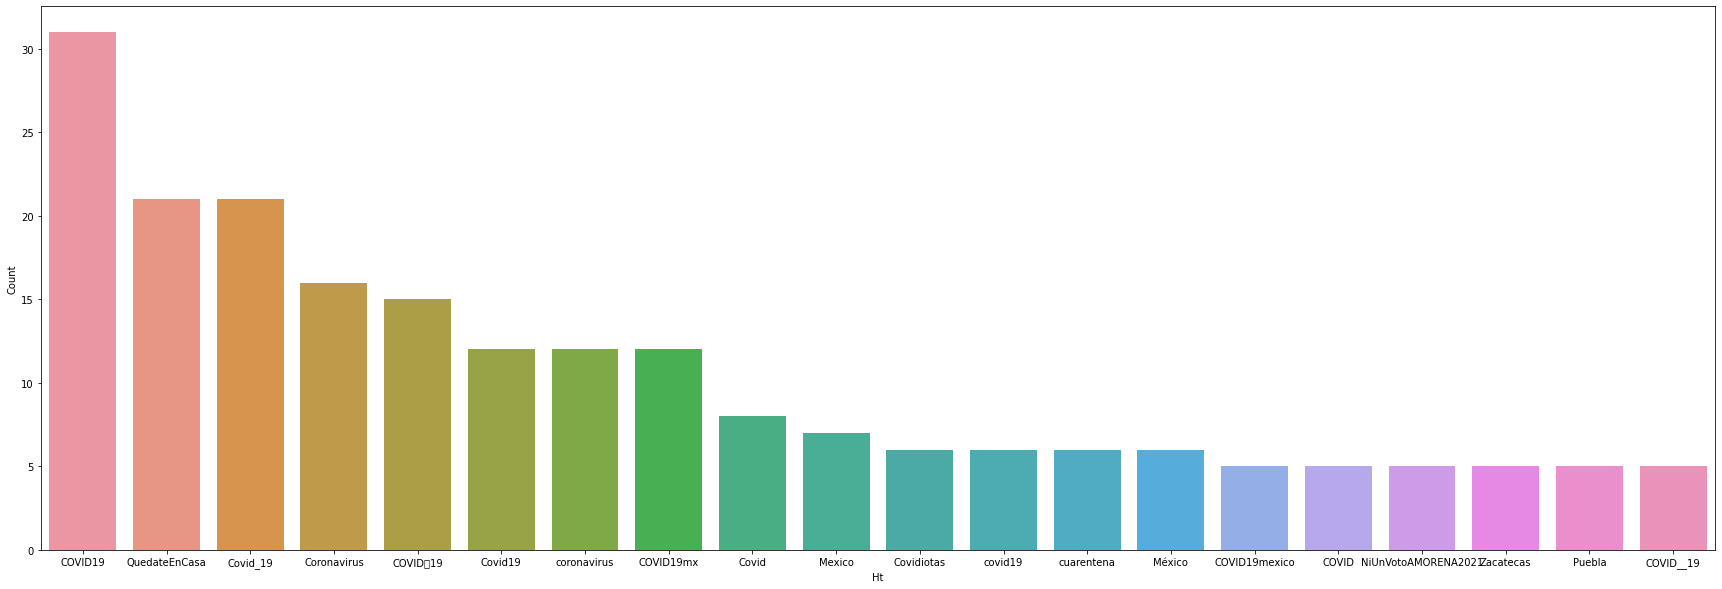

In [204]:
import seaborn as sns
from itertools import chain

def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags


ht_positivo = hashtag_extract(df['Tweet'][df['Label'] == 'POSITIVO']) 
ht_negativo = hashtag_extract(df['Tweet'][df['Label'] == 'NEGATIVO']) 
ht_positivo = list(chain(*ht_positivo))
ht_negativo = list(chain(*ht_negativo))    

a = nltk.FreqDist(ht_negativo)
d = pd.DataFrame( {'Ht': list(a.keys()), 'Count': list(a.values())}) 

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,10))
ax = sns.barplot(data=d, x= "Ht", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Train-test sets

In [26]:
from sklearn.model_selection import train_test_split

X1 = df['norm_tweet']          #Tweets normalizados
X2 = df['lem_tweet']           #Tweets lemmatizados
X3 = df['tokenized_tweet']     #Normalizados y tokenizados
X4 = df['lemtokenized_tweet']  #Lemmatizados y tokenizados 
X5 = df['normtoksw_tweet']     #Normalizados, tokenizados y sin stopwords
X6 = df['lemtoksw_tweet']      #Lemmatizados, tokenizados y sin stopwords 
y = df['Label']                #Etiquetas

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25 ,random_state=37)

In [241]:
value, counts = np.unique(y_train, return_counts=True)
print(dict(zip(value, 100 * counts / sum(counts))))
value, counts = np.unique(y_test, return_counts=True)
print(dict(zip(value, 100 * counts / sum(counts))))

{'NEGATIVO': 33.64296081277213, 'NEUTRO': 44.93468795355588, 'POSITIVO': 21.42235123367199}
{'NEGATIVO': 34.89991296779809, 'NEUTRO': 44.38642297650131, 'POSITIVO': 20.713664055700608}


## Vectorizaciones

### Tf-idf

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf= TfidfVectorizer(min_df=3, ngram_range=(1,2), stop_words = stop_words_esp).fit(X2)
                        
print('Numero de features: ' +str(len(tfidf.get_feature_names_out())))
tfidf.fit(X_train)

Numero de features: 3629


TfidfVectorizer(min_df=3, ngram_range=(1, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [90]:
feature_names = np.array(tfidf.get_feature_names_out())
sorted_tfidf_index= X_train_tfidf.max(0).toarray()[0].argsort()

print('smallest tfidf: {}'.format(feature_names[sorted_tfidf_index[:10]]))
print('largest tfidf: {}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

smallest tfidf: ['buen lunes' 'app' 'inicio semana' 'inmediato' 'oms' 'periodico hoy'
 'alto contagio' 'ganar seguidor' 'calidad' 'amlolujo']
largest tfidf: ['financiero' 'muerte covid' 'lugar' 'movil' 'movilidad' 'dar positivo'
 'lopez' 'muerte' 'cuidarte profesional' 'gracia']


In [87]:
X_train_tfidf = tfidf.transform(X2)
X_test_tfidf  = tfidf.transform(X_test)
X_train_tfidf 

<4594x1889 sparse matrix of type '<class 'numpy.float64'>'
	with 31592 stored elements in Compressed Sparse Row format>

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvect = CountVectorizer(min_df=3, ngram_range=(1,2), stop_words = stop_words_esp).fit(X2)

print('Numero de features: ' +str(len(countvect.get_feature_names_out())))
countvect.fit(X_train)

Numero de features: 5812


CountVectorizer(min_df=3, ngram_range=(1, 2))

In [ ]:
X_train_cv = countvect.transform(X_train)
X_test_cv  = countvect.transform(X_test)
X_train_cv

<3445x5078 sparse matrix of type '<class 'numpy.int64'>'
	with 34810 stored elements in Compressed Sparse Row format>

### Word Embedding

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models import FastText

wordvectors_file = 'data/wiki.es.vec'
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file, limit=600000)

#embedding=200
#w2v = Word2Vec(X6, min_count=3, vector_size=embedding, window=5, sg=1 )
#w2v.train(X6, total_examples= len(df['lem_tweet']), epochs=20)

#wordvectors.most_similar('pozole')

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += wordvectors[word].reshape((1, size))
            count += 1.
        except KeyError:  
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(X6), 300)) 
for i in range(len(X6)):
    wordvec_arrays[i,:] = word_vector(X6[i], 300)
    
X_w2v = pd.DataFrame(wordvec_arrays)
X_w2v

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.199650,0.146120,-0.397610,-0.134060,-0.124030,0.043285,-0.540940,-0.408670,-0.270940,-0.284350,...,-0.167110,-0.183540,0.160220,-0.284470,-0.358530,-0.036859,-0.191910,0.209960,-0.025340,-0.049462
1,-0.142475,-0.085206,-0.050855,0.082698,0.067600,0.183996,-0.138616,-0.222747,0.000170,-0.229493,...,-0.227170,-0.181665,0.219462,-0.367688,-0.546457,-0.392620,-0.231044,0.035569,0.294788,0.045607
2,-0.131046,-0.119666,0.052167,-0.075688,-0.113871,0.055189,-0.079611,0.109801,-0.029892,-0.119357,...,-0.039405,-0.133616,0.072189,-0.077564,-0.345878,-0.107051,-0.123686,-0.082093,0.119210,0.017394
3,-0.299046,-0.191633,0.253063,-0.214180,-0.026059,0.158802,0.088487,-0.136892,0.091283,-0.172194,...,0.207801,-0.214163,0.085227,0.156068,-0.591670,-0.146331,-0.399453,-0.028873,0.083240,-0.056193
4,0.146360,-0.168850,-0.056031,0.271720,0.250750,-0.035431,0.227980,-0.351770,0.027346,0.134620,...,-0.219130,-0.038307,-0.320240,-0.011023,-0.467790,-0.301260,-0.250900,0.074294,0.272100,0.165880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,-0.141318,-0.086340,-0.032988,-0.113929,-0.044326,-0.077627,-0.133587,0.006850,0.002785,-0.114851,...,0.072404,-0.041523,0.176587,-0.091940,-0.439057,-0.203643,-0.269778,-0.098308,0.063625,0.066887
4590,-0.100010,-0.122477,0.046185,-0.156757,0.080696,0.110449,0.013325,0.218701,-0.066374,-0.290542,...,0.138265,0.007051,0.064581,-0.071415,-0.374027,0.043926,-0.171304,0.058039,0.087208,0.005246
4591,-0.166104,-0.167094,-0.068781,-0.087213,0.011695,0.013015,-0.162700,-0.041467,0.053745,-0.125015,...,-0.147699,-0.129134,0.053048,-0.056272,-0.439437,-0.150708,-0.162047,-0.017900,0.173029,0.002070
4592,-0.042201,-0.023073,-0.098283,-0.158680,-0.018651,0.114612,-0.006874,0.109499,-0.114346,-0.213025,...,-0.011148,-0.018566,0.191011,0.114785,-0.326523,-0.036063,-0.224028,-0.093913,0.052558,-0.040599


### Vocabulario

In [ ]:
# vocabulario CountVectorizer:
print(f" Número de tokens creados: {len(countvect.get_feature_names_out())}")
countvect.get_feature_names_out()

# vocabuilario TFIDF:
#print(f" Número de tokens creados: {len(tfidf.get_feature_names_out())}")
#tfidf.get_feature_names()

 Número de tokens creados: 5078


array(['aa', 'abajo', 'abajo car', ..., 'zona', 'zona marginado', 'zoom'],
      dtype=object)

## Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

value, counts = np.unique(y_test, return_counts=True)
pesos=dict(zip(value, 100 * counts / sum(counts))) # Proporcion de cada clase en el corpus

lr = LogisticRegression(C=0.5, solver='lbfgs', penalty='l2', class_weight=None, multi_class='ovr', random_state=2, max_iter=1000)
lr.fit(X_train_cv, y_train)

predic_lr = lr.predict(X_test_cv)
probas_lr = lr.predict_proba(X_test_cv)
scores_lr = lr.decision_function(X_test_cv)

In [ ]:
pos_prob = probas_lr[:,2]
neu_prob = probas_lr[:,1]
neg_prob = probas_lr[:,0]

y_predict_pos = ['POSITIVO' if prob > 0.4  else predic_lr for prob in pos_prob]
y_predict_neg = ['NEGATIVO' if prob > 0.4  else predic_lr for prob in neg_prob]

In [ ]:
print('Score train set:' + str(lr.score(X_train_cv, y_train)))
print('Score test set:' + str(lr.score(X_test_cv, y_test)))
print(lr.classes_)

score_list = list(zip(y_test[0:5],scores_lr[0:5]))
proba_list = list(zip(y_test[0:5],probas_lr[0:5]))

Score train set:0.8664731494920174
Score test set:0.6275021758050479
['NEGATIVO' 'NEUTRO' 'POSITIVO']


     0    1   2
0  232  154  15
1   67  398  45
2   43  104  91


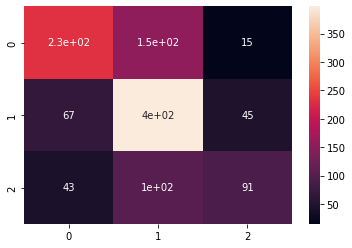

<Figure size 720x360 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_matrix = pd.DataFrame(confusion_matrix(y_test, predic_lr))
print(df_matrix)
sns.heatmap(df_matrix, annot=True, vmin=1, vmax=400)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

lr_auc = roc_auc_score(y_test, probas_lr, multi_class = 'ovr')
print(lr_auc)

0.7748836399486873


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ' + str(accuracy_score(y_test, predic_lr)))
print('Precision: ' + str(precision_score(y_test, predic_lr, average='weighted')))
print('Recall: ' + str(recall_score(y_test, predic_lr, average='weighted')))
print('f1-score: ' + str(f1_score(y_test, predic_lr, average='weighted')))

Accuracy: 0.6275021758050479
Precision: 0.630874314270097
Recall: 0.6275021758050479
f1-score: 0.6178759457349603


In [ ]:
from sklearn.metrics import classification_report

new = np.asarray(y_test)
print(classification_report(y_test, predic_lr))

              precision    recall  f1-score   support

    NEGATIVO       0.68      0.58      0.62       401
      NEUTRO       0.61      0.78      0.68       510
    POSITIVO       0.60      0.38      0.47       238

    accuracy                           0.63      1149
   macro avg       0.63      0.58      0.59      1149
weighted avg       0.63      0.63      0.62      1149



## Validacion cruzada

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, validation_curve

#tfidf2 = TfidfVectorizer(min_df=3, stop_words = stop_words_esp, ngram_range=(1,2)).fit(X2)
#X_tfidf = tfidf2.transform(X2)
#lr.fit(X_tfidf, y)

countvect2 = CountVectorizer(min_df=2, stop_words = stop_words_esp, ngram_range=(1,2)).fit(X2)
X_cv = countvect2.transform(X2)
lr.fit(X_cv,y)

#lr.fit(X_w2v,y)

cv_scores = cross_val_score(lr,X_cv,y, cv=65)
#predicted_labels = model_selection.cross_val_predict(lr,X_tfidf, y, cv = 10)

print(cv_scores.mean())
print(float(cv_scores.max()),float(cv_scores.min()))

0.6251509054325955
0.7605633802816901 0.5070422535211268


## Optimizacion de Hyperparametros

### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=37)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search_g = GridSearchCV(lr, space, cv=cv, scoring='accuracy', n_jobs=-1)
result1 = search_g.fit(X_train_cv, y_train)


### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=37)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

search = RandomizedSearchCV(lr, space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_train_cv, y_train)
